In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets, layers , models
import matplotlib.pyplot as plt

In [3]:
fashion_mnist= datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
print(len(train_images))

60000


In [ ]:
print(len(train_labels))

60000


In [ ]:
print(train_images[0].shape)


(28, 28)


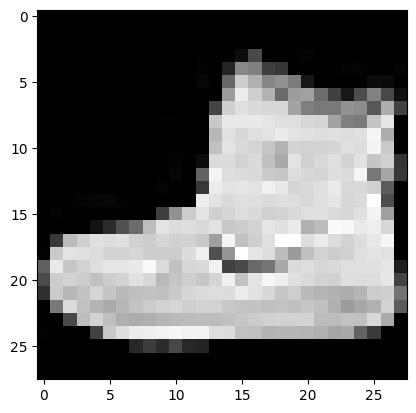

In [ ]:
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [ ]:
print(train_labels[0])

9


In [ ]:
train_images= train_images/255.0
test_images= test_images/255.0

In [ ]:
train_images=train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images=test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
#build a convolutional base
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4906 - accuracy: 0.8203 - val_loss: 0.3659 - val_accuracy: 0.8682
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3193 - accuracy: 0.8812 - val_loss: 0.3190 - val_accuracy: 0.8847
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2710 - accuracy: 0.9003 - val_loss: 0.3002 - val_accuracy: 0.8927
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2399 - accuracy: 0.9116 - val_loss: 0.2712 - val_accuracy: 0.9020
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2173 - accuracy: 0.9192 - val_loss: 0.2829 - val_accuracy: 0.9015


In [ ]:
test_loss , test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 0.2829 - accuracy: 0.9015 - 894ms/epoch - 3ms/step


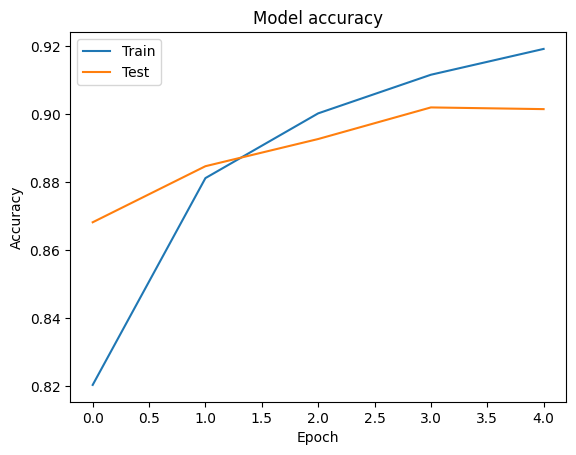

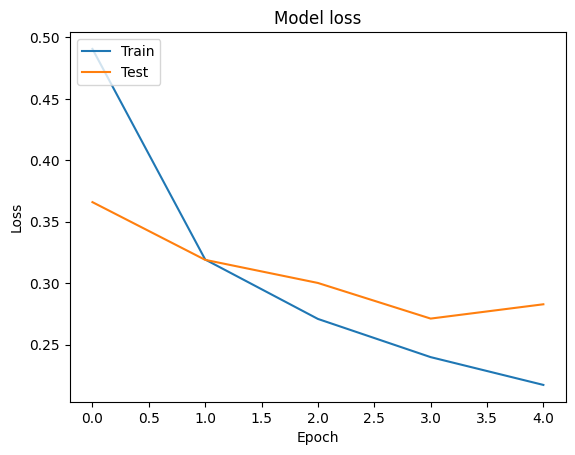

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
